In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##1. Data Cleaning and Feature Engineering

In [263]:
df = pd.read_csv('/content/drive/MyDrive/Final_DSNotes/Datasets_New/Churn_Modelling.csv')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [265]:
df.duplicated().sum()

0

In [266]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [267]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [268]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [269]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [270]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [271]:
#Encoding using Dummies
df = pd.get_dummies(df,columns=['Geography','Gender'])
for i in df.columns[-5:]:
  df[i] = df[i].replace({True: 1, False: 0})

<ipython-input-271-040d78250232>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [272]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [273]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [275]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

<Axes: >

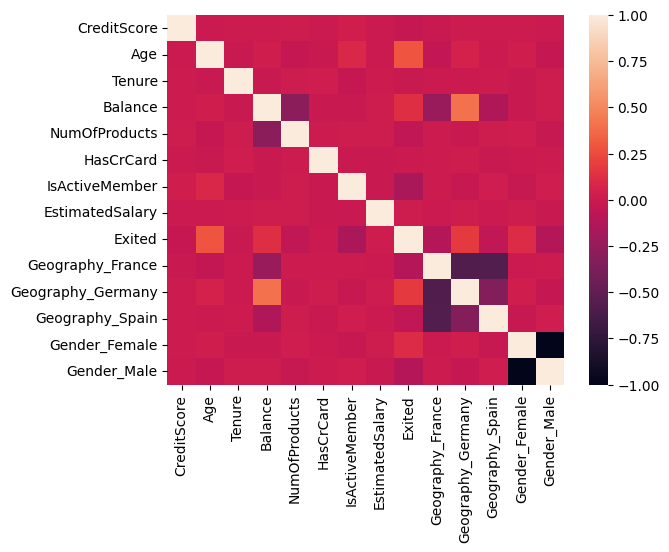

In [277]:
sns.heatmap(df.corr())

##ANN Model Creation

In [278]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [279]:

model = Sequential()

model.add(Dense(5,activation='relu',input_dim=13))
model.add(Dense(5,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [280]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 5)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106 (424.00 B)

 Trainable params: 106 (424.00 B)

 Non-trainable params: 0 (0.00 B)

In [281]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [293]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3366 - val_accuracy: 0.8581 - val_loss: 0.3471
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.3376 - val_accuracy: 0.8575 - val_loss: 0.3472
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3353 - val_accuracy: 0.8575 - val_loss: 0.3473
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.3281 - val_accuracy: 0.8556 - val_loss: 0.3477
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3262 - val_accuracy: 0.8594 - val_loss: 0.3483
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3332 - val_accuracy: 0.8594 - val_loss: 0.3471
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3439 - val_accuracy: 0.8562 - val_loss: 0.3476
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3404 - val_accu

In [283]:
model.layers[1].get_weights()

[array([[-0.98777884,  0.8363111 ,  0.8336238 , -0.13353978,  0.9610201 ],
        [ 0.700945  ,  0.72679627,  0.24080487, -0.6123238 , -0.28191444],
        [-0.45105094,  0.00914308,  0.3381693 ,  0.56596273,  0.16929203],
        [-0.6759581 , -0.35173365,  0.32326847,  0.05594412,  0.58011895],
        [ 0.00642731, -1.3035623 , -1.189726  , -0.5733767 , -1.3104377 ]],
       dtype=float32),
 array([-0.18126068,  0.00492543, -0.00761692,  0.02069243, -0.01223036],
       dtype=float32)]

In [284]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [285]:
ypred = (np.where(y_log>0.5,1,0))

##Accuracy

accuracy Score: 0.8585


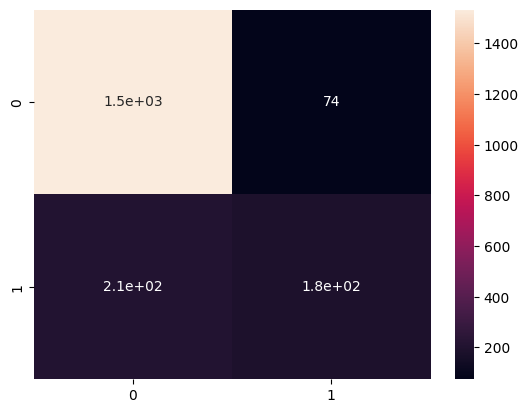

In [286]:
from sklearn.metrics import accuracy_score,confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)
print('accuracy Score:', accuracy_score(y_test,ypred))

In [287]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3417 - val_accuracy: 0.8606 - val_loss: 0.3459
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3283 - val_accuracy: 0.8587 - val_loss: 0.3460
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3380 - val_accuracy: 0.8606 - val_loss: 0.3452
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3303 - val_accuracy: 0.8600 - val_loss: 0.3461
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8613 - loss: 0.3432 - val_accuracy: 0.8612 - val_loss: 0.3455
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8715 - loss: 0.3303 - val_accuracy: 0.8575 - val_loss: 0.3455
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8691 - loss: 0.3278 - val_accuracy: 0.8575 - val_loss: 0.3450
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8613 - loss: 0.3403 - val_acc

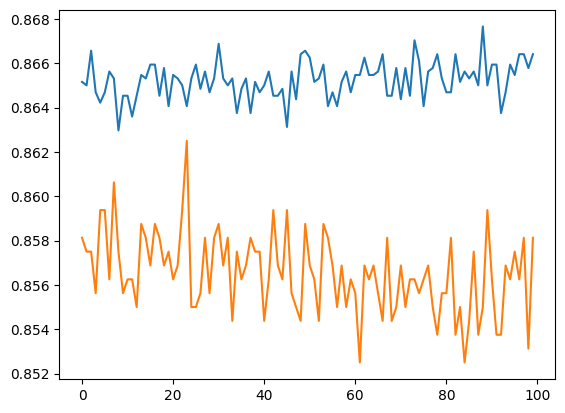

In [295]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])